# Case Study: Growth

## Introduction

Company A is a popular photo editing product with millions of active users. The Growth Unit is responsible for expanding the user base, increasing user engagement, and retaining users. 
They are interested in understanding **user behavior and engagement** with its product. Below, a dataset containing user activity data was provided. Your task is to analyze this data and provide **actionable insights** and recommendations to **improve user growth and engagement**. 
In this task, you will be working with datasets that contain event logs and app open data for a specified period.

#### Part 1
1- Write a SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.
2- Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th
3- Write a SQL query to calculate the user’s daily retention rate for a 7-day period. Calculate both Sticky and Cohorted Retention

#### Part 2 
1- Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts.

Expected output: A memo in a form of Google doc that describes the finding and outlines action items. Additional attachments (spreadsheets, Jupyter notebooks, etc.) only if it is necessary

## Data Understanding and cleaning

#### App Open 
______________________________________________________

| Column        | Data Type         | Description                               | Unique Key|
| ----------- | ----------- | ----------- | ----------- |
| timestamp     |TIMESTAMP          |Timestamp when the app was opened          |No|
| device_skey   |STRING             |Unique identifier for the device           |No|
| session_skey  |STRING             |Unique identifier for the session          |No|
| user_skey     |STRING             |Unique identifier for the users            |No|
| is_first_app_open |BOOLEAN        |Indicator of whether it's the first time app open for the user |No|
| platform      |STRING             |Platform on which the app was opened (e.g., android, apple) |No|
| country_code  |STRING             |Country from which the app was opened (e.g., us, de) |No|

In [1]:
apps_open = _deepnote_execute_sql('SELECT \n    timestamp AS date_time\n    , device_skey::VARCHAR AS device_skey\n    , session_skey::VARCHAR AS session_skey\n    , user_skey::VARCHAR AS user_skey\n    , is_first_app_open::BOOLEAN AS is_first_app_open\n    , platform::VARCHAR AS platform\n    , country_code::VARCHAR AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/App Opens.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
apps_open

,date_time,device_skey,session_skey,user_skey,is_first_app_open,platform,country_code
0,2023-11-08 02:07:19.673,7891415701568881512,2011583431778737851,-8717167265529084706,False,android,br
1,2023-11-08 06:26:35.953,2841158506866498595,-710585864896703953,3858142552250413010,False,android,vn
2,2023-11-08 11:00:09.578,8319180276841915965,8851130170214692120,-6901249382849255824,False,apple,vn
3,2023-11-08 17:03:55.775,-7044717482868540199,2562809385083234043,42,False,apple,vn
4,2023-11-08 10:09:35.170,8330275025360404105,6269721242185127990,-8100364697395241128,False,android,de
...,...,...,...,...,...,...,...
196085,2023-11-15 11:47:15.631,-1985881793666309748,1078423291596019483,3098934470375878848,False,android,br
196086,2023-11-15 15:24:53.931,2134527128238454256,-3747564580958942091,-8099055897267782491,False,apple,br
196087,2023-11-15 15:31:40.914,-2987017123302243105,-6832478710689874856,-8250782251817560378,False,android,vn
196088,2023-11-15 20:41:23.133,1438462127647457196,-5384106018072454101,-46678441358607097,False,android,br


#### Events
______________________________________________________


| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
event_name |STRING |Type of event occurred |No
timestamp |TIMESTAMP |Timestamp when the event occurred |No
event_skey |STRING |Unique identifier for the event |Yes
device_skey |STRING |Unique identifier for the device |No
user_skey |STRING |Unique identifier for the user |No
session_skey |STRING |Unique identifier for the session |No
platform |STRING |Platform on which the event occurred (e.g., android, apple) |No
source |STRING |Source screen from which the event was triggered |No
country_code |STRING |Country from which the app was opened (e.g., us, de) | No

In [2]:
events = _deepnote_execute_sql('SELECT \n    event_name::STRING AS event_name\n    , epoch_ms(timestamp) AS date_time\n    , event_skey::STRING AS event_skey\n    , device_skey::STRING AS device_skey\n    , user_skey::STRING AS user_skey\n    , session_skey::STRING AS session_skey\n    , platform::STRING AS platform\n    , source::STRING AS source\n    , country_code::STRING AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/Events.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
events

,event_name,date_time,event_skey,device_skey,user_skey,session_skey,platform,source,country_code
0,registration_open,2023-11-11 03:32:05.905,-927509160255567445,-724186991312688217,null,5342905048311674142,apple,app_start,vn
1,registration_open,2023-11-11 03:16:02.636,6726005894254876970,167579040429311423,null,1033335939576521366,android,app_start,vn
2,registration_open,2023-11-10 15:18:40.465,-2921948449119298022,-753449636207296314,null,7698330632377898188,apple,app_start,vn
3,registration_open,2023-11-10 15:46:26.774,920368455108193822,6151555484025284746,null,1455590834684669000,android,user_profile,br
4,registration_open,2023-11-10 15:46:35.428,4301569710999595535,6151555484025284746,null,1455590834684669000,android,user_profile,br
...,...,...,...,...,...,...,...,...,...
762098,object_export,2023-11-06 03:19:28.217,8762455078106490544,-218442561903040844,-7394739150698595004,4931081474184387585,apple,editor_screen,vn
762099,object_export,2023-11-06 03:19:33.857,1236197224848669172,-8953068508614011099,-5616148740068329164,1939940093157332532,apple,editor_add_objects,vn
762100,object_export,2023-11-06 00:40:15.840,-1128268909705829967,7622198276030932501,-4476277103857062859,-914698409805777184,apple,share_screen,br
762101,object_export,2023-11-06 03:46:08.259,-5041445763328466000,-2972284481220770541,5642301744160861251,-2767914012090684930,android,editor_add_objects,eg


#### Visitors
______________________________________________________

| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
|Date |STRING| Date of visit | yes
Store Visitors. Source: search | BIGINT |Number of store visitors from the source search |No
Store Visitors. Source: explore | BIGINT |Number of store visitors from the source explore |No
Store Visitors. Source: referrals | BIGINT |Number of store visitors from the source referrals |No

In [3]:
visitors = _deepnote_execute_sql('SELECT \n    Date::TIMESTAMP_S AS date_time\n    , "Store Visitors. Source: search"::BIGINT AS store_visitors_source_search\n    , "Store Visitors. Source: explore"::BIGINT AS store_visitors_source_explore\n    , "Store Visitors. Source: referrals"::BIGINT AS store_visitors_source_referrals\nFROM \'ps_challanges/growth_case_study/Datasets/store_visitors.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
visitors

,date_time,store_visitors_source_search,store_visitors_source_explore,store_visitors_source_referrals
0,2023-11-01,6,6,5
1,2023-11-02,7,8,7
2,2023-11-03,3,3,2
3,2023-11-04,286,3,3
4,2023-11-05,7,9,6
5,2023-11-06,2,4,2
6,2023-11-07,4,7,4
7,2023-11-08,1,3,2
8,2023-11-09,6,12,6
9,2023-11-10,8,15,7


In [4]:
import pandas as pd
import plotly.graph_objects as go

## Part 1 - SQL

> 1- Write an SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.

In [5]:
clean = _deepnote_execute_sql('--- Get the events for the specified sessions\nWITH events_session AS (\n    SELECT\n        -- session_skey\n        -- , first_session.first_touch\n         events.date_time\n        , apps_open.platform\n        , apps_open.user_skey\n        , events.event_name\n        , FIRST(apps_open.date_time) OVER (PARTITION BY apps_open.user_skey, apps_open.platform ORDER BY apps_open.date_time DESC) AS first_touch\n        , FIRST(events.session_skey) OVER (PARTITION BY apps_open.user_skey, apps_open.platform ORDER BY events.date_time DESC) AS session_skey\n        , LAG(events.event_name) OVER (PARTITION BY events.session_skey ORDER BY events.date_time) AS prev_event\n    FROM apps_open\n    LEFT JOIN events ON apps_open.session_skey = events.session_skey \n    AND date_trunc(\'week\', apps_open.date_time) = date_trunc(\'week\', events.date_time)\n    AND apps_open.device_skey = events.device_skey\n)\n\n--- Exclude events that occur before the first app open or repeated in a small time interval\n, ranked AS (\n    SELECT     \n        session_skey\n        , date_time\n        , prev_event\n        , user_skey\n        , platform\n        , event_name\n        , RANK() OVER (PARTITION BY session_skey, user_skey ORDER BY date_time) AS funnel_step\n    FROM events_session\n    WHERE (prev_event != event_name OR prev_event IS NULL) \n    AND date_time >= first_touch\n)\n\n--- Label the funnel steps\n, labeled AS (\n    SELECT \n        session_skey AS user_session\n        , date_time\n        , platform\n        , event_name\n        , funnel_step\n    FROM ranked\n    WHERE funnel_step < 6\n)\n\nSELECT * FROM labeled', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
clean

,user_session,date_time,platform,event_name,funnel_step
0,-1162701704687308763,2023-11-08 04:41:59.097,android,object_export,1
1,-1162701704687308763,2023-11-08 04:42:10.125,android,editor_open,2
2,-3665096084789243476,2023-11-15 00:23:05.718,apple,create_flow_open,1
3,-3665096084789243476,2023-11-15 00:23:06.020,apple,editor_open,2
4,-3665096084789243476,2023-11-15 00:28:19.642,apple,subscription_offer_open,3
...,...,...,...,...,...
1696,8550641113823742791,2023-11-18 01:40:34.765,android,create_flow_open,1
1697,8550641113823742791,2023-11-18 01:40:37.975,android,subscription_offer_open,2
1698,8550641113823742791,2023-11-18 01:40:41.972,android,editor_open,3
1699,8550641113823742791,2023-11-18 01:40:47.259,android,subscription_offer_open,4


### Most Common Paths

In [6]:
general_path = _deepnote_execute_sql('WITH pivoted AS ( \n    PIVOT clean\n    ON CONCAT(\'step_\', funnel_step)\n    USING FIRST(event_name)\n    GROUP BY user_session, platform\n)\n\n, apple AS (\n    SELECT \n         CONCAT(step_1, \' -> \', step_2, \' -> \', step_3) AS path\n        , COUNT(user_session) AS apple_users\n        , SUM(apple_users) OVER () AS apple_total_users\n    FROM pivoted\n    WHERE platform = \'apple\'\n    GROUP BY 1, platform\n    ORDER BY apple_users DESC\n)\n\n, android AS (\n    SELECT \n         CONCAT(step_1, \' -> \', step_2, \' -> \', step_3) AS path\n        , COUNT(user_session) AS android_users\n        , SUM(android_users) OVER () AS android_total_users\n    FROM pivoted\n    WHERE platform = \'android\'\n    GROUP BY 1\n    ORDER BY android_users DESC\n)\n\nSELECT\n    path\n    , apple_users\n    , android_users\n\n    , (apple_users/apple_total_users * 100)::DECIMAL(10, 2) AS percentage_apple\n    , (android_users/android_total_users * 100)::DECIMAL(10, 2) AS percentage_android\n\n    , apple_users + android_users AS total_users\nFROM apple \nLEFT JOIN android USING (path)\nORDER BY total_users DESC\nLIMIT 5', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
general_path

,path,apple_users,android_users,percentage_apple,percentage_android,total_users
0,create_flow_open -> subscription_offer_open ->...,77,58,29.28,19.80,135
1,create_flow_open -> editor_open -> object_export,40,76,15.21,25.94,116
2,create_flow_open -> ->,26,26,9.89,8.87,52
3,create_flow_open -> editor_open ->,20,31,7.60,10.58,51
4,editor_open -> object_export ->,19,23,7.22,7.85,42


Apple events:

In [7]:
apple = _deepnote_execute_sql('SELECT DISTINCT event_name\n    , SUM(CASE WHEN funnel_step = 1 THEN 1 ELSE 0 END) AS step_1\n    , SUM(CASE WHEN funnel_step = 2 THEN 1 ELSE 0 END) AS step_2\n    , SUM(CASE WHEN funnel_step = 3 THEN 1 ELSE 0 END) AS step_3 \n    , SUM(CASE WHEN funnel_step = 4 THEN 1 ELSE 0 END) AS step_4 \n    , SUM(CASE WHEN funnel_step = 5 THEN 1 ELSE 0 END) AS step_5\nFROM clean\nWHERE platform = \'apple\'\nGROUP BY 1\nHAVING step_1 > 2\nORDER BY step_1 DESC', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
apple

,event_name,step_1,step_2,step_3,step_4,step_5
0,create_flow_open,195,25,5,4,8
1,editor_open,60,82,98,32,25
2,object_export,5,38,42,80,23
3,subscription_offer_open,3,83,32,18,8


Android events:

In [8]:
android = _deepnote_execute_sql('SELECT DISTINCT event_name\n    , SUM(CASE WHEN funnel_step = 1 THEN 1 ELSE 0 END) AS step_1\n    , SUM(CASE WHEN funnel_step = 2 THEN 1 ELSE 0 END) AS step_2\n    , SUM(CASE WHEN funnel_step = 3 THEN 1 ELSE 0 END) AS step_3 \n    , SUM(CASE WHEN funnel_step = 4 THEN 1 ELSE 0 END) AS step_4 \n    , SUM(CASE WHEN funnel_step = 5 THEN 1 ELSE 0 END) AS step_5\nFROM clean\nWHERE platform = \'android\'\nGROUP BY 1\nHAVING step_1 > 2\nORDER BY step_1 DESC', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
android

,event_name,step_1,step_2,step_3,step_4,step_5
0,create_flow_open,215,4,4,5,3
1,editor_open,45,116,69,32,17
2,subscription_offer_open,19,65,11,7,2
3,object_export,12,49,83,44,29


> 2. Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th

**New Users:** 
Definition used: Users who had their first open app during the current week.
-> First week: 2
-> Second week: 1

**Weakly Active Users Growth:**
Definition used: Number of Users with app_open event on week 1, divided by the number of users with app_open event on week 2:
-> 1,9699% Growth

Definition used: Number of Users with app_open + another distinct event on week 1, divided by the number of users with app_open + another distinct event on week 2:
-> 1.9975% Growth

**Retained Users:** 
Definition used: Users who used the application in the current week and the week before. 
-> Second week: 1.971
_If we consider all the non-new users that used the application in the first week as retained (not ideal): 68070_

**Resurrected Users:** 
Definition used: Users who used the app in the current week, but not the previous week, and at some point before the previous week. 
-> 67.441

**Churned Users:** 
Definition used: Users who used the app in the previous week, but not the current week. 
-> 66.101

In [9]:
growth_percentage = _deepnote_execute_sql('WITH totals AS (\n    SELECT \n        date_trunc(\'week\', apps_open.date_time) AS week\n        , COUNT(DISTINCT apps_open.user_skey) AS users_total\n        , COUNT(DISTINCT CASE WHEN events.user_skey IS NULL THEN apps_open.user_skey END) AS users_active\n    FROM apps_open\n    LEFT JOIN events ON apps_open.session_skey = events.session_skey\n    GROUP BY 1\n)\n\n, growth AS (\n    SELECT\n    -- week\n     (users_total/LAG(users_total) OVER (ORDER BY week) -1) * 100 AS growth_total\n    , (users_active/LAG(users_active) OVER (ORDER BY week) -1) * 100 AS growth_active\n    FROM totals\n)\n\nSELECT * FROM growth\nWHERE growth_total IS NOT NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
growth_percentage

,growth_total,growth_active
0,1.969973,1.997522


In [10]:
base_users = _deepnote_execute_sql('-- Get the weekly status of each user based on first_app_open and if there was an event in the same week.active\n-- For this,the values will be encoded as follow: 4 - active, 5 - inactive, 7 - new, 5 - existing\n\nWITH encode AS (\n    SELECT DISTINCT\n        apps_open.user_skey AS apps_user_key\n        , COALESCE(date_trunc(\'week\', apps_open.date_time), date_trunc(\'week\', events.date_time)) AS week \n        , MAX(CASE WHEN events.user_skey IS NOT NULL THEN 5\n                   WHEN (events.user_skey IS NULL OR events.session_skey IS NULL) THEN 4\n                   ELSE 1 END) AS is_active\n        , MAX(CASE WHEN is_first_app_open = True THEN 7\n                   WHEN is_first_app_open = False THEN 5 \n                   ELSE 1 END) AS is_new\n        , COALESCE(is_active + is_new, 0) AS total\n    FROM apps_open\n        LEFT JOIN events ON apps_open.session_skey = events.session_skey \n        AND date_trunc(\'week\', apps_open.date_time) = date_trunc(\'week\', events.date_time)\n        AND apps_open.device_skey = events.device_skey\n    GROUP BY 1, 2\n)\n\n, pivoted AS (\n    PIVOT encode ON week USING MAX(total) GROUP BY apps_user_key\n)\n\n, decode AS (\nSELECT apps_user_key\n    , CASE WHEN "2023-11-06" IN (11, 12) THEN \'new\'\n           WHEN "2023-11-06" = 9 THEN \'existing_active\'\n           WHEN "2023-11-06" IN (9, 10) THEN \'existing\'\n           END AS week_1\n    , CASE WHEN "2023-11-13" IN (11, 12) THEN \'new\'\n           WHEN "2023-11-13" = 9 THEN \'existing_active\'\n           WHEN "2023-11-13" IN (9, 10) THEN \'existing\'\n           END AS week_2\nFROM pivoted\n-- GROUP BY  1,2\n)\n, unique_status AS (\n SELECT *, \n  CASE WHEN  week_1 = \'new\'                    THEN \'New week 1:\'\n        WHEN week_1 IS NULL AND week_2 = \'new\' THEN \'New week 2:\'\n        WHEN week_1 IS NOT NULL\n         AND week_2 IS NULL                    THEN \'Churned:\'\n        WHEN week_1 IS NULL\n         AND week_2 IS NOT NULL                THEN \'Ressurrected:\'\n        WHEN week_1 IS NOT NULL \n         AND week_2 IS NOT NULL                THEN \'Retained:\'\n    END AS status\nFROM decode\n)\n\nSELECT \n    status\n    , COUNT(DISTINCT apps_user_key) AS users\nFROM unique_status\nGROUP BY 1', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
base_users

,status,users
0,Churned:,66101
1,Ressurrected:,67441
2,Retained:,1969
3,New week 2:,1
4,New week 1:,2


> 3. Write a SQL query to calculate the user’s daily retention rate for 7 days. Calculate both Sticky and Cohorted Retention

Retention rate is a measure of how many users return to the app after their first visit. 
- Cohorted Retention: This looks at users who started using the application on a specific date, then checks to see if they're still using the app after a certain number of days.
- Sticky Retention: This is a measure of how often the user is engaged with the app (usually on a daily or monthly basis). It's calculated by dividing the Daily Active Users (DAU) by the Monthly/Week Active Users (M/WAU).

In [11]:
cohort = _deepnote_execute_sql('WITH cohorts AS (\n    SELECT\n        apps_open.user_skey,\n        DATE_TRUNC(\'day\', MIN(apps_open.date_time)) AS start_date\n    FROM apps_open\n    WHERE date_time > \'2023-11-07\'\n    GROUP BY 1\n)\n\n, cohort AS (\n    SELECT\n        start_date\n        , \'day\' AS beginning\n        , date_diff(\'day\', start_date, DATE_TRUNC(\'day\', date_time)) AS cohort_date\n        , COUNT(DISTINCT user_skey) AS total_users\n    FROM apps_open\n    JOIN cohorts USING (user_skey)\n    GROUP BY 1,2,3\n)\n\n,pivoted AS (\nPIVOT (SELECT * FROM cohort WHERE cohort_date <= 7) \n    ON beginning,cohort_date USING SUM(total_users)\n)\n\nSELECT \n    start_date\n        , day_1\n        , (day_2/day_1 * 100)::DECIMAL(10,2) || \'%\' AS rate_day_2\n        , (day_3/day_1 * 100)::DECIMAL(10,2) || \'%\' AS rate_day_3\n        , (day_4/day_1 * 100)::DECIMAL(10,2) || \'%\' AS rate_day_4\n        , (day_5/day_1 * 100)::DECIMAL(10,2) || \'%\' AS rate_day_5\n        , (day_6/day_1 * 100)::DECIMAL(10,2) || \'%\' AS rate_day_6\n        , (day_7/day_1 * 100)::DECIMAL(10,2) || \'%\' AS rate_day_7\nFROM pivoted\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
cohort

,start_date,day_1,rate_day_2,rate_day_3,rate_day_4,rate_day_5,rate_day_6,rate_day_7
0,2023-11-10,53.0,94.34%,86.79%,86.79%,83.02%,101.89%,71.70%
1,2023-11-08,70.0,74.29%,47.14%,68.57%,48.57%,67.14%,71.43%
2,2023-11-09,56.0,64.29%,96.43%,64.29%,85.71%,60.71%,91.07%
3,2023-11-11,62.0,87.10%,62.90%,80.65%,75.81%,66.13%,91.94%
4,2023-11-07,76.0,80.26%,80.26%,59.21%,60.53%,64.47%,68.42%
5,2023-11-12,64.0,82.81%,46.88%,73.44%,62.50%,79.69%,68.75%
6,2023-11-16,44.0,90.91%,95.45%,None,None,None,None
7,2023-11-17,52.0,75.00%,None,None,None,None,None
8,2023-11-18,49.0,None,None,None,None,None,None
9,2023-11-14,52.0,73.08%,101.92%,88.46%,67.31%,None,None


In [12]:
stickiness = _deepnote_execute_sql('WITH daily_users AS (\n    SELECT \n        DATE_TRUNC(\'day\', date_time) AS day,\n        COUNT(DISTINCT user_skey) AS dau\n    FROM events\n    GROUP BY 1\n),\n\nweekly_users AS (\n    SELECT\n        DATE_TRUNC(\'week\', date_time) AS week,\n        COUNT(DISTINCT user_skey) AS wau\n    FROM events\n    GROUP BY 1\n)\n\nSELECT\n    week,\n    (AVG(dau) / wau *100)::DECIMAL(10,5) || \' %\'AS sticky_retention\nFROM daily_users\nJOIN weekly_users ON DATE_TRUNC(\'week\', day) = week\nGROUP BY week, wau', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
stickiness

,week,sticky_retention
0,2023-11-06,14.51583 %
1,2023-11-13,14.51684 %


## Part 2 - User Activity Analysis

> Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts.

#### Analysis focus:

**1. Daily unique users:** Help us understand the daily user engagement, trends and behaviors in the app.

**2. User tendencies over platforms:** Evaluate the proportion of users on different platforms (Apple vs Android).
> - This analysis can offer a better understanding of user preferences and could guide developers in optimizing the  app experience for particular platforms.
> - It can help guide the development team to tailor their work to the preference of majority users.
> - Distinguishing and understanding user preferences across different platforms can help guide the development team > tailor their work to the preference of majority users.

**3. Day of the week influence:** Identifying fluctuations of user engagement throughout the week can assist in timely and targeted marketing campaigns.

**4. Time spent on the app:** Evaluate the time spent on the app across different platforms and provide insights on how to improve the user experience.

#### Insights:

- Promotions or campaigns can be timed to periods of low user engagement to boost usage during these times.
- If the majority of users prefer one platform over another, consider focusing on enhancing the user experience on that platform.
- Use engagement patterns to inform future feature developments, updates, and bug fixes.

### Daily unique users

In [13]:
import pandas as pd

apps_open_df = apps_open
apps_open_df['date_time'] = pd.to_datetime(apps_open_df['date_time'])
apps_open_df['date_time'] = apps_open_df['date_time'].dt.date

unique_users_per_day = (apps_open_df.groupby(["date_time", "platform"])["user_skey"].nunique().unstack(level=-1).reset_index())
unique_users_per_day['android_proportion'] = unique_users_per_day['android'] / (unique_users_per_day['apple'] + unique_users_per_day['android']) * 100
unique_users_per_day['apple_proportion'] = 100 - unique_users_per_day['android_proportion'] 

In [14]:
import plotly.subplots as sp
import plotly.express as px

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Number of Daily Active Users by Platform", "Proportion of users per day per platform"), vertical_spacing=0.05)

fig1 = px.line(unique_users_per_day, x='date_time', y=['android', 'apple'])
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig1['data'][1], row=1, col=1)

fig2 = px.area(unique_users_per_day, x='date_time', y=['android_proportion', 'apple_proportion'], title='Proportion of users per day per platform')
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig2['data'][1], row=1, col=2)

fig.update_layout(height=350, width=900, showlegend=False)
fig.show()

<AxesSubplot: xlabel='weekday'>

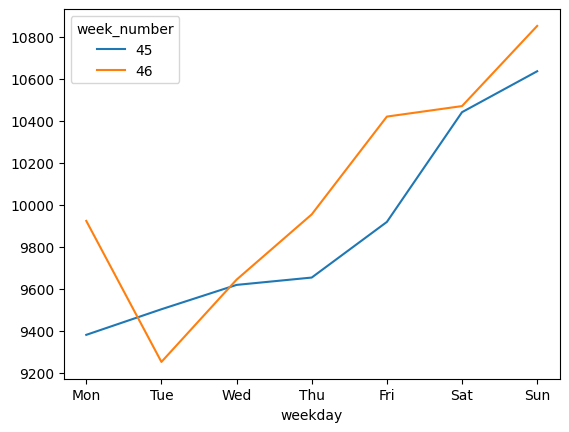

In [15]:
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

date_week = unique_users_per_day['date_time'].apply(lambda x: pd.Series([x.strftime('%d/%m'), x.strftime('%a'), x.isocalendar().week]))
user_sums = unique_users_per_day['apple'] + unique_users_per_day['android']

weekly_mov = pd.concat([date_week, user_sums], axis=1)
weekly_mov.columns = ['date', 'weekday', 'week_number', 'total']
pivot_table = weekly_mov.pivot(index='weekday', columns='week_number', values='total')
pivot_table = pivot_table.reindex(days_order)
pivot_table.plot()

In [16]:
unique_users_per_day.describe()[['android', 'apple']].round(2)

platform,android,apple
count,14.00,14.00
mean,5626.21,4350.57
std,314.96,203.96
min,5192.00,4009.00
25%,5397.50,4194.00
50%,5543.00,4337.00
75%,5878.50,4519.75
max,6195.00,4658.00


#### Observations

- The standard deviation (a measure of the variability of a set of values) is higher for Android (314.96) compared to Apple (203.96). A higher standard deviation means that the number of daily unique users varies more from day to day on Android than on Apple. 

- The minimum and maximum number of daily unique users are also both higher on Android compared to Apple. 

- The proportion of users on Android and Apple platforms remain relatively consistent over time, with Android consistently having a higher proportion of users (around 56%) compared to Apple (around 44%).

- There does not seem to be any significant fluctuations or upward/downward trends in the proportions over the time period observed.

- The consistency in the proportion of users across different platforms suggests that user behavior and preferences remain stable over time. 

- The higher proportion of Android users indicates that the app is more popular among Android users. This could be due to various reasons such as user experience, app performance, and availability of features.

#### Suggestions:

- While the current user base is more Android-heavy, it is also crucial to not overlook the Apple user base. Dedicating resources on both platforms could improve user experience and potentially draw in more users.

- Given the stable proportion of Android and Apple users, the development team could focus on improving the app’s features and performance on both platforms rather than prioritizing one over another.

- Running promotional campaigns or introducing new features could potentially shift the proportion and increase user base on both platforms. It would be helpful to monitor changes in the proportion, especially after making significant updates to the app.

#### In-app time spent

1. **Distribution and Outliers**: High session lengths with a low amount of events could represent users who leave the app open without interacting with it, while low session lengths might indicate issues that cause users to leave the > app early. 
    > A feature could be introduced to confirm if the user is still active, or the app could automatically close or pause after a certain period of inactivity to save resources. 
    > If session lengths are consistently low for either platform, this suggests an issue that affects user experience. More in-depth user behavior analytics or user feedback could help identify any problem areas or bugs that need to be addressed.

2. **Compare Platforms**: If there are significant differences, this could highlight platform-specific issues or usage patterns.

3. **Trends Over Time**: Evaluate if there are any trends or changes in session length over time. This can provide insights into the impact of updates or changes to the app. 

4. **Correlation with Other Factors**: Analyze if session length correlates with other factors like particular events or sources of visitors.

#### Actionable suggestions:
=====================
1. **Investigate High Session Lengths**: If there are users who have high session lengths with minimal events, the app could introduce a feature to confirm if the user is still active or to automatically pause/close after a certain period of inactivity. This could save server resources and offer a better user experience.

2. **Investigate Low Session Lengths**: If there are users who consistently have low session lengths, this could indicate a problem with the user experience. User feedback or further analysis could help identify any potential issues or bugs that need to be addressed.

3. **Observe Changes Over Time**: If there are noticeable changes in session length over time following updates or changes to the app, this could inform the impact and success of these changes. For example, if session length increases following a new feature launch, this could suggest the feature was well-received.

4. **Correlate outliers with user source**: If session length is consistently high or low for a specific user source, this could indicate an issue with user acquisition or retention.

4. **Correlation with Other Factors**: If session length correlates with specific events or visitor sources, this can inform user acquisition strategy. For example, if users coming from a certain source tend to have longer sessions, it might be worth investing more in that acquisition channel.

In [17]:
session_lengths = events.groupby(['session_skey','user_skey', 'platform'])['date_time'].agg(['min', 'max']).reset_index() 
session_lengths['length_minutes'] = (session_lengths['max'] - session_lengths['min']).dt.total_seconds()/60 
print("In-app time spent: ") 
print(session_lengths.groupby('platform')['length_minutes'].describe().round(3))

In-app time spent: 
             count   mean     std  min    25%    50%    75%       max
platform                                                             
android   106763.0  3.377  10.928  0.0  0.093  1.044  3.810  2869.731
apple      65332.0  3.309  15.945  0.0  0.106  1.040  3.526  2785.387


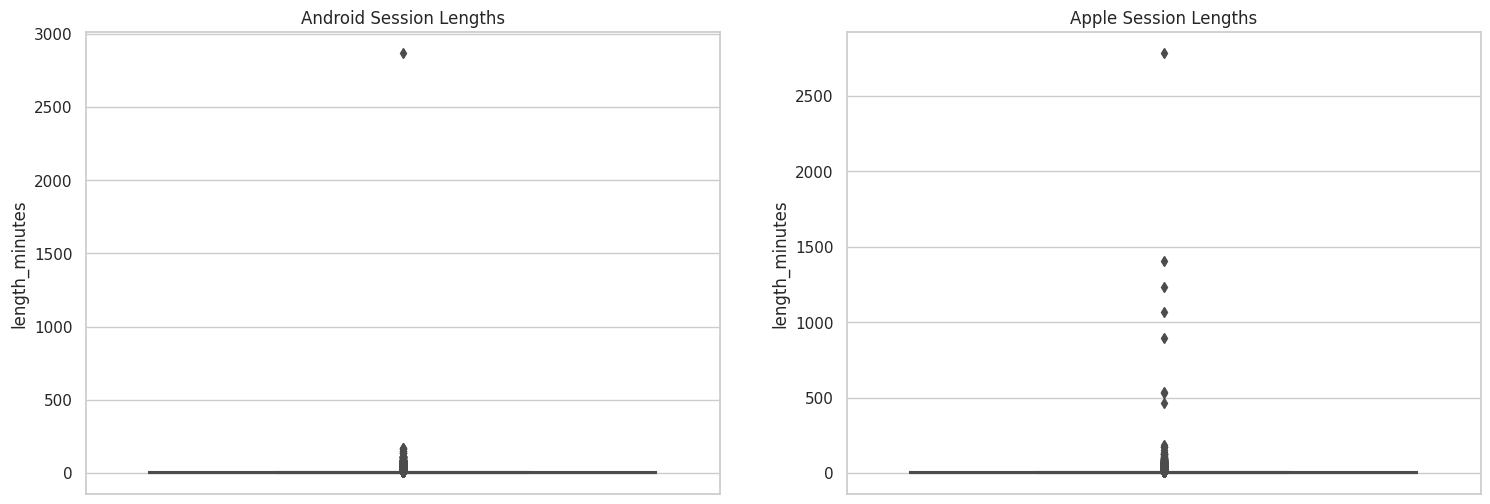

In [18]:
# Import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Android
sns.boxplot(ax=axes[0], y="length_minutes", data=session_lengths[session_lengths["platform"] == "android"]).set_title('Android Session Lengths')

# Boxplot for Apple
sns.boxplot(ax=axes[1], y="length_minutes", data=session_lengths[session_lengths["platform"] == "apple"]).set_title('Apple Session Lengths')

# Show the plot
plt.show()


1. The majority of sessions for both Android and Apple users are quite short, with most sessions being under 20 minutes. However, there are a significant number of outliers stretching as long as approximately 2900 minutes or about 48 hours.

2. This suggests that majority of users engage with the app for short periods, but there are also users who keep the app open for extended periods, possibly even leaving it open in the background unintentionally.

To evaluate more granular session length patterns and any potential change across different times, we should also investigate session length variation over time.

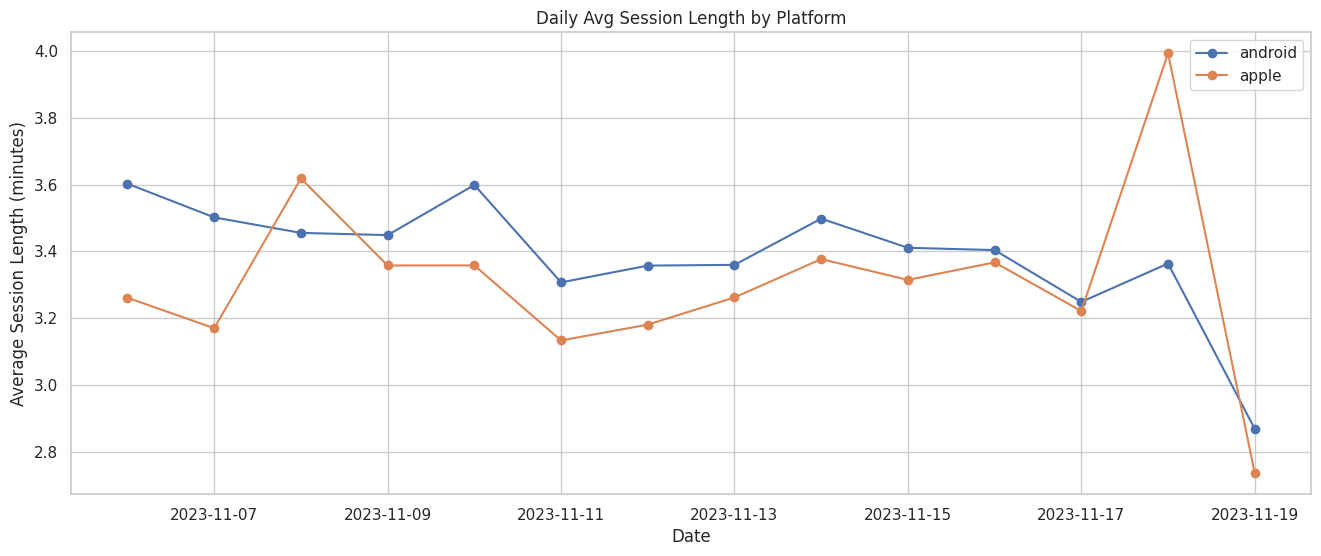

In [20]:
# Resampling the session lengths data by day and calculating mean session length for each platform
session_lengths['min'] = pd.to_datetime(session_lengths['min'])
session_lengths.set_index('min', inplace=True)

# Resampling and mean calculation
session_length_by_day_android = session_lengths[session_lengths['platform']=='android'].resample('D').mean()
session_length_by_day_apple = session_lengths[session_lengths['platform']=='apple'].resample('D').mean()

# Resetting index
session_length_by_day_android.reset_index(inplace=True)
session_length_by_day_apple.reset_index(inplace=True)

# Rename column from 'min' to 'date'
session_length_by_day_android.rename(columns={'min': 'date'}, inplace=True)  
session_length_by_day_apple.rename(columns={'min': 'date'}, inplace=True)  

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))
# Android
ax.plot(session_length_by_day_android['date'], session_length_by_day_android['length_minutes'],
        marker='o', linestyle='-', label='android')
# Apple
ax.plot(session_length_by_day_apple['date'], session_length_by_day_apple['length_minutes'],
        marker='o', linestyle='-', label='apple')

ax.set(xlabel="Date", ylabel="Average Session Length (minutes)", title="Daily Avg Session Length by Platform")
ax.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea0dd5ec-7a99-4815-85b5-15ffe4204711' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>